### Load 2D Dataset

In [1]:
import numpy as np
from Sigmoid_Necessary_Functions_With_Regularization_Or_Dropout_With_Optimizers_Model import *
from Gradient_Checker_With_Regularization_Or_Dropout_With_Optimizers import *
from Load_Dataset import load_dataset
import matplotlib.pyplot as plt



/Users/Apple/anaconda3/envs/Arya/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


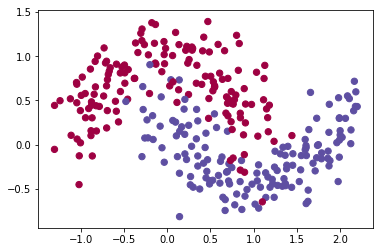

In [2]:
X_train, Y_train = load_dataset()

In [3]:
print('X_train has shape :' +str(X_train.shape))
print('Y_train has shape :' +str(Y_train.shape))


X_train has shape :(2, 300)
Y_train has shape :(1, 300)


cost after 0 epochs is 0.6693952460453744
cost after 100 epochs is 0.6609270898479466
cost after 200 epochs is 0.6507574599309045
cost after 300 epochs is 0.6463878983242329
cost after 400 epochs is 0.6416928046846033
cost after 500 epochs is 0.6441074497976661
cost after 600 epochs is 0.6173392890945018
cost after 700 epochs is 0.6249759347162359
cost after 800 epochs is 0.6003301720615185
cost after 900 epochs is 0.5500696870257108


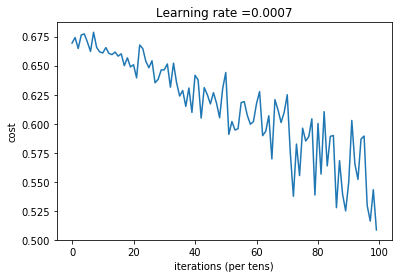

Train accuracy is: 0.8366666666666667
Maximum Train accuracy until now is 0.8366666666666667
cost after 0 epochs is 0.5828792567056483
cost after 100 epochs is 0.6332014488830974
cost after 200 epochs is 0.6167385312472639
cost after 300 epochs is 0.6442619382214633
cost after 400 epochs is 0.5088477956525022
cost after 500 epochs is 0.6621620792831299
cost after 600 epochs is 0.5697172493381231
cost after 700 epochs is 0.608674061376855
cost after 800 epochs is 0.5807892320056146
cost after 900 epochs is 0.5413927835134024


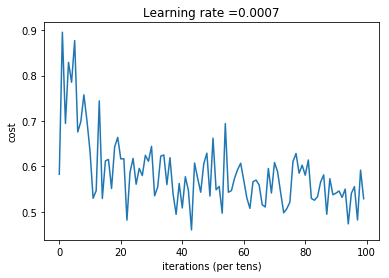

Train accuracy is: 0.7366666666666667
Maximum Train accuracy until now is 0.8366666666666667
cost after 0 epochs is 0.6637022402312895
cost after 100 epochs is 0.6274252619286332
cost after 200 epochs is 0.36176793916953026
cost after 300 epochs is 0.2960730488202016
cost after 400 epochs is 0.38102528539989583
cost after 500 epochs is 0.4830298389467412
cost after 600 epochs is 0.31134581109502546
cost after 700 epochs is 0.3918042334204163
cost after 800 epochs is 0.14146437855533633
cost after 900 epochs is 0.15998668244767944


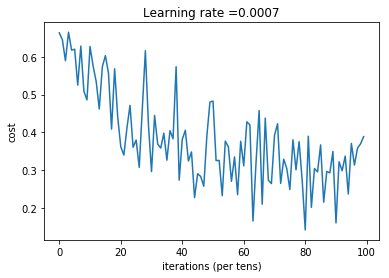

Train accuracy is: 0.8766666666666667
Maximum Train accuracy until now is 0.8766666666666667
cost after 0 epochs is 0.7893985799477409
cost after 100 epochs is 0.5054507882451994
cost after 200 epochs is 0.34445057637495285
cost after 300 epochs is 0.27937665477316653
cost after 400 epochs is 0.3759672970726949
cost after 500 epochs is 0.3941111075392349
cost after 600 epochs is 0.4979192370637875
cost after 700 epochs is 0.3115004732706115
cost after 800 epochs is 0.423023654467935
cost after 900 epochs is 0.2609914089276022


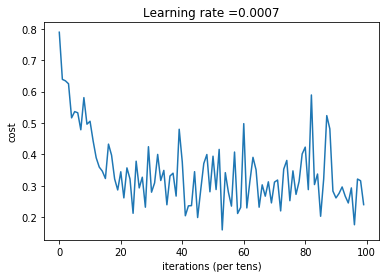

Train accuracy is: 0.8833333333333333
Maximum Train accuracy until now is 0.8833333333333333


In [4]:
optimizers = ['gd', 'momentum', 'rms_prop', 'adam']
lst = []

for optimizer in optimizers:
    parameters = regularized_or_dropout_optimizers_model_sigmoid(X_train, Y_train, layers_dims = [X_train.shape[0], 5, 2, 1], minibatch_size = 64, lambd = 0, keep_prob = 0, optimizer = optimizer,  num_epochs = 1000, learning_rate = 0.0007, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8) 
    train_accuracy = predict_accuracy(X_train, Y_train, parameters)
    t = (parameters, train_accuracy)
    lst.append(t)
    parameters, max_train_accuracy = max(lst,key=lambda item:item[1])
    if max_train_accuracy > 0.95:
        break
    print('Train accuracy is: '+str(train_accuracy))
    print('Maximum Train accuracy until now is ' +str(max_train_accuracy))

In [217]:
AL, cache = forward_prop_with_dropout(X_train, parameters, keep_prob =0.7)
gradients = back_prop_with_dropout(X_train, Y_train, cache, keep_prob = 0.7)
difference = gradient_checker_with_regularization_or_dropout(X_train, Y_train, parameters, gradients, 0, 0.7)

gradient using grad checker is[0.26163768]
gradient using back prop is[0.26163768]
gradient using grad checker is[0.07564835]
gradient using back prop is[0.07564835]
gradient using grad checker is[-0.24453132]
gradient using back prop is[-0.24453132]
gradient using grad checker is[-0.0209893]
gradient using back prop is[-0.0209893]
gradient using grad checker is[0.02037916]
gradient using back prop is[0.02037916]
gradient using grad checker is[-0.01150397]
gradient using back prop is[-0.01150397]
gradient using grad checker is[-0.1952124]
gradient using back prop is[-0.1952124]
gradient using grad checker is[-0.01531785]
gradient using back prop is[-0.01531785]
gradient using grad checker is[-0.09089517]
gradient using back prop is[-0.09089517]
gradient using grad checker is[0.06251538]
gradient using back prop is[0.06251538]
gradient using grad checker is[0.28390852]
gradient using back prop is[0.28390852]
gradient using grad checker is[-0.13977919]
gradient using back prop is[-0.1397

[2, 17, 13, 19, 19, 1]


0.00612717093373762


32


momentum


In [4]:
def automated_hypertuning(X_train, Y_train):
    lst_param_accuracy = []
    train_accuracy = 0

    while(train_accuracy < 0.9):
        layers_dims = random_layers_dims(X_train)
        learning_rate = random_alpha()
        minibatch_size = random_minibatch_size(X_train)
        optimizer = random_optimizer()
        lambd = random_lambd()
        parameters = regularized_or_dropout_optimizers_model_sigmoid(X_train, Y_train, layers_dims = layers_dims, minibatch_size = minibatch_size, lambd = lambd, keep_prob = 0, optimizer = optimizer,  num_epochs = 1000, learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8)
        train_accuracy = predict_accuracy(X_train, Y_train, parameters)
        t = (parameters, train_accuracy)
        lst_param_accuracy.append(t)
        parameters_for_max_train_accuracy, max_train_accuracy = max(lst_param_accuracy,key=lambda item:item[1])
        hyperparameters_for_max_train_accuracy = (layers_dims, minibatch_size, lambd, optimizer, learning_rate)
        
        print('Train accuracy is: '+str(train_accuracy))
        print('Maximum Train accuracy until now is ' +str(max_train_accuracy))
        
    return parameters_for_max_train_accuracy, hyperparameters_for_max_train_accuracy


cost after 0 epochs is 1.0887680092216077
cost after 100 epochs is 0.43432520472503355
cost after 200 epochs is 0.3934955518354868
cost after 300 epochs is 0.4101232747614938
cost after 400 epochs is 0.4622319038837025
cost after 500 epochs is 0.48379179112164394
cost after 600 epochs is 0.47510998369389534
cost after 700 epochs is 0.4147803865109846
cost after 800 epochs is 0.3977344491489393
cost after 900 epochs is 0.5147570367296397


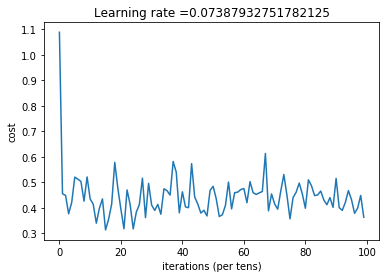

Train accuracy is: 0.93
Maximum Train accuracy until now is 0.93


In [6]:
parameters, hyperparameters = automated_hypertuning(X_train, Y_train)

In [7]:
print(hyperparameters)


([2, 19, 10, 13, 1], 64, 1.1827015598556145, 'adam', 0.07387932751782125)


In [241]:
print(optimizer)

adam


cost after 0 epochs is 0.9517173278962219
cost after 100 epochs is 0.19225001915236598
cost after 200 epochs is 0.16954889878345566
cost after 300 epochs is 0.16400515795690693
cost after 400 epochs is 0.16159999301813827
cost after 500 epochs is 0.16028676339936088
cost after 600 epochs is 0.158759003017155
cost after 700 epochs is 0.15751260575521692
cost after 800 epochs is 0.15521530238954517
cost after 900 epochs is 0.15221996052583014


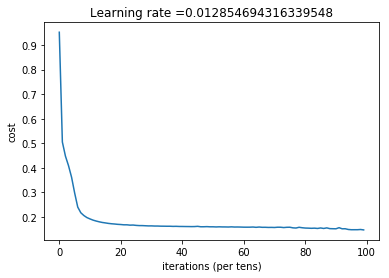

In [249]:
parameters = regularized_or_dropout_optimizers_model_sigmoid(X_train, Y_train, layers_dims = layers_dims, minibatch_size = 512, lambd = 0.8, keep_prob = 0, optimizer = optimizer,  num_epochs = 1000, learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999)
train_accuracy = predict_accuracy(X_train, Y_train, parameters)

In [250]:
print(train_accuracy)

0.96


cost after 0 epochs is 0.8747500767816998
cost after 100 epochs is 0.6639631231029794
cost after 200 epochs is 0.6073243684799043
cost after 300 epochs is 0.5771627760010772
cost after 400 epochs is 0.5581317822041318
cost after 500 epochs is 0.5453393010552124
cost after 600 epochs is 0.5356306002218488
cost after 700 epochs is 0.5274127456915092
cost after 800 epochs is 0.521019211945644
cost after 900 epochs is 0.5160188274966825


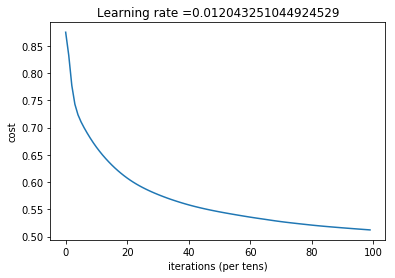

Train accuracy for current model is: 0.86
Maximum Train accuracy until now using different set of hyperparameters is 0.86
cost after 0 epochs is 0.7813225929389503
cost after 100 epochs is 0.34481589666825124
cost after 200 epochs is 0.2571695078015269
cost after 300 epochs is 0.23270109626271096
cost after 400 epochs is 0.21832947110135675
cost after 500 epochs is 0.20845191065531293
cost after 600 epochs is 0.2022906035673181
cost after 700 epochs is 0.19565699782095436
cost after 800 epochs is 0.19438491147873194
cost after 900 epochs is 0.18580730463510303


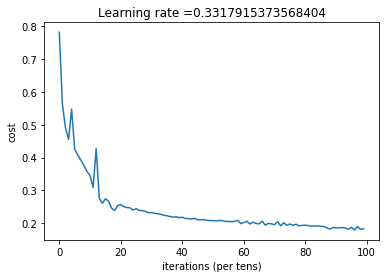

Train accuracy for current model is: 0.9433333333333334
Maximum Train accuracy until now using different set of hyperparameters is 0.9433333333333334
cost after 0 epochs is 0.8829922422934628
cost after 100 epochs is 0.37555190400458704
cost after 200 epochs is 0.18755854113979212
cost after 300 epochs is 0.17436230854735574
cost after 400 epochs is 0.16747991624843822
cost after 500 epochs is 0.16280507298756824
cost after 600 epochs is 0.15967146213448075
cost after 700 epochs is 0.15743327971299917
cost after 800 epochs is 0.15577567360710948
cost after 900 epochs is 0.15442826872114368


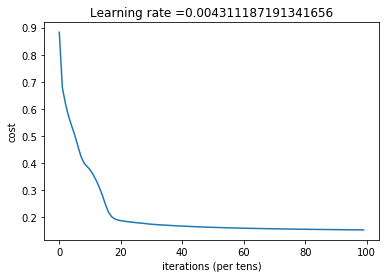

Train accuracy for current model is: 0.9466666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.6689268505754425
cost after 100 epochs is 0.3500083771646099
cost after 200 epochs is 0.33107005054426686
cost after 300 epochs is 0.31439045908919006
cost after 400 epochs is 0.29631372852290117
cost after 500 epochs is 0.2800511344354937
cost after 600 epochs is 0.2623970689344654
cost after 700 epochs is 0.24193849013154334
cost after 800 epochs is 0.2254800808906604
cost after 900 epochs is 0.2121801424685349


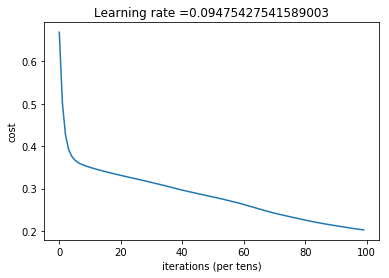

Train accuracy for current model is: 0.9266666666666666
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 1.3448104265756788
cost after 100 epochs is 0.3376733004074417
cost after 200 epochs is 0.25384817855711506
cost after 300 epochs is 0.23734217558982734
cost after 400 epochs is 0.23010875409347709
cost after 500 epochs is 0.2281769425983905
cost after 600 epochs is 0.2232749890090207
cost after 700 epochs is 0.22355985290147987
cost after 800 epochs is 0.22145902832231018
cost after 900 epochs is 0.22046313434656906


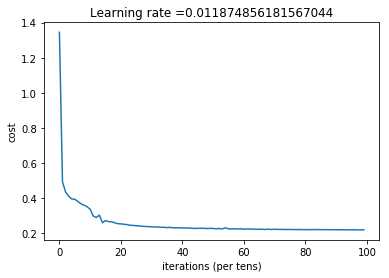

Train accuracy for current model is: 0.9366666666666666
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 4.168951955278484
cost after 100 epochs is 2.838173768847725
cost after 200 epochs is 2.4535705809761525
cost after 300 epochs is 1.6661207718391706
cost after 400 epochs is 1.3927473866173705
cost after 500 epochs is 1.3999355664882374
cost after 600 epochs is 1.1243318916328076
cost after 700 epochs is 0.7863367962435441
cost after 800 epochs is 0.7557369534955415
cost after 900 epochs is 0.6068914477880178


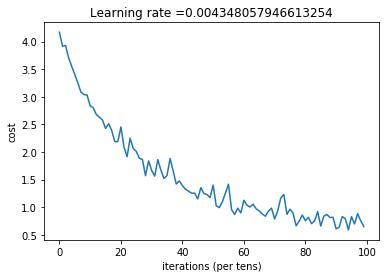

Train accuracy for current model is: 0.8566666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.6779346419356763
cost after 100 epochs is 0.3481691455523533
cost after 200 epochs is 0.3486569464434906
cost after 300 epochs is 0.34319859034761235
cost after 400 epochs is 0.34313635314678426
cost after 500 epochs is 0.3436522347620543
cost after 600 epochs is 0.34648120556931583
cost after 700 epochs is 0.3426937608242741
cost after 800 epochs is 0.34412524166377845
cost after 900 epochs is 0.34278731464514167


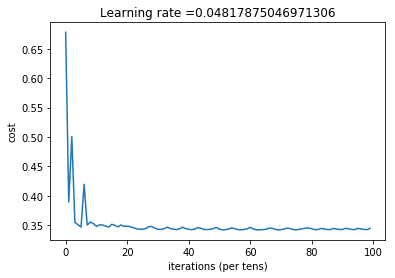

Train accuracy for current model is: 0.86
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.9343933058937604
cost after 100 epochs is 0.4832841831035891
cost after 200 epochs is 0.46139919981510136
cost after 300 epochs is 0.4482760287098454
cost after 400 epochs is 0.43789855292070246
cost after 500 epochs is 0.4286431815102915
cost after 600 epochs is 0.42015257802952
cost after 700 epochs is 0.4124833615781561
cost after 800 epochs is 0.40539683511079766
cost after 900 epochs is 0.398344746905956


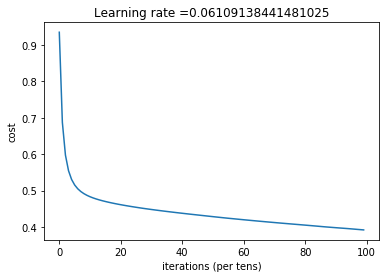

Train accuracy for current model is: 0.88
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 1.3172640403599603
cost after 100 epochs is 0.21603074512386933
cost after 200 epochs is 0.21398271357738194
cost after 300 epochs is 0.205465674372376
cost after 400 epochs is 0.2002946508187636
cost after 500 epochs is 0.19599035682507782
cost after 600 epochs is 0.19523168270356403
cost after 700 epochs is 0.1932802714706855
cost after 800 epochs is 0.18952507438384972
cost after 900 epochs is 0.1894154385022746


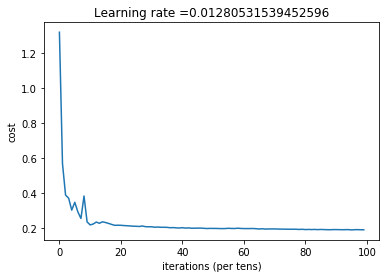

Train accuracy for current model is: 0.9433333333333334
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.830042011315341
cost after 100 epochs is 0.35826825664167156
cost after 200 epochs is 0.34029988426554597
cost after 300 epochs is 0.3256374782737403
cost after 400 epochs is 0.3091604737801345
cost after 500 epochs is 0.2940533897381023
cost after 600 epochs is 0.28375001734547484
cost after 700 epochs is 0.27467074377436873
cost after 800 epochs is 0.2690193386774195
cost after 900 epochs is 0.2652081553166252


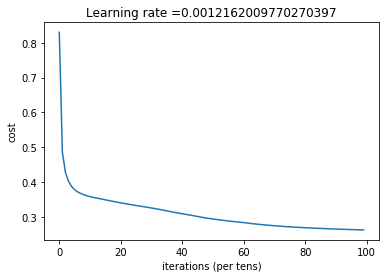

Train accuracy for current model is: 0.9266666666666666
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 2.2149730048942997
cost after 100 epochs is 2.024260314632834
cost after 200 epochs is 1.9431768878006583
cost after 300 epochs is 1.876941951468805
cost after 400 epochs is 1.8754870639328138
cost after 500 epochs is 1.8154948715752643
cost after 600 epochs is 1.8901424483276827
cost after 700 epochs is 1.7954699328733266
cost after 800 epochs is 1.8029803868566219
cost after 900 epochs is 1.845461926799277


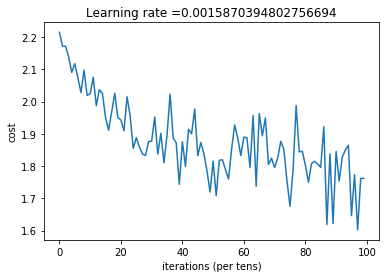

Train accuracy for current model is: 0.8566666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.8822674905266805
cost after 100 epochs is 0.4929561404300623
cost after 200 epochs is 0.4615080297601348
cost after 300 epochs is 0.3655443965454735
cost after 400 epochs is 0.3990222325763989
cost after 500 epochs is 0.3926621119527113
cost after 600 epochs is 0.43791666970646714
cost after 700 epochs is 0.44578360526095895
cost after 800 epochs is 0.32174886776608264
cost after 900 epochs is 0.3208586984358945


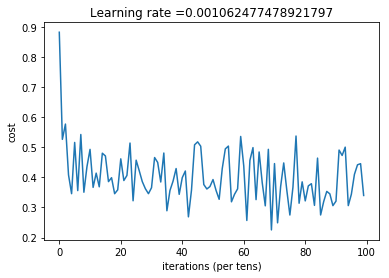

Train accuracy for current model is: 0.8566666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.7256574423043863
cost after 100 epochs is 0.323278987691146
cost after 200 epochs is 0.29226139858408456
cost after 300 epochs is 0.26320098593335456
cost after 400 epochs is 0.23372586169373488
cost after 500 epochs is 0.20323060088129474
cost after 600 epochs is 0.17790369779402948
cost after 700 epochs is 0.16111726317083183
cost after 800 epochs is 0.14832476568107203
cost after 900 epochs is 0.14105498178949827


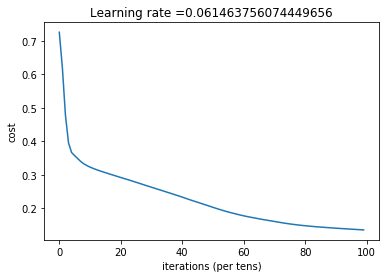

Train accuracy for current model is: 0.9433333333333334
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.7664286316432812
cost after 100 epochs is 0.5006957898795069
cost after 200 epochs is 0.4623959097362438
cost after 300 epochs is 0.4476948458439543
cost after 400 epochs is 0.4372676932350484
cost after 500 epochs is 0.42889874540265005
cost after 600 epochs is 0.4219836563440419
cost after 700 epochs is 0.4155903242044303
cost after 800 epochs is 0.40956581269521686
cost after 900 epochs is 0.40430497401709053


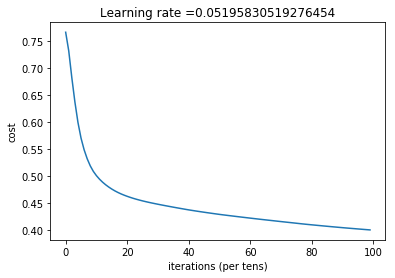

Train accuracy for current model is: 0.8733333333333333
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 1.142269626491549
cost after 100 epochs is 0.6694810503573521
cost after 200 epochs is 0.49316545357594826
cost after 300 epochs is 0.41827964218415137
cost after 400 epochs is 0.36258865330392864
cost after 500 epochs is 0.5003370813902392
cost after 600 epochs is 0.4253373207370551
cost after 700 epochs is 0.4217430884678999
cost after 800 epochs is 0.34651022974020657
cost after 900 epochs is 0.43713730562955444


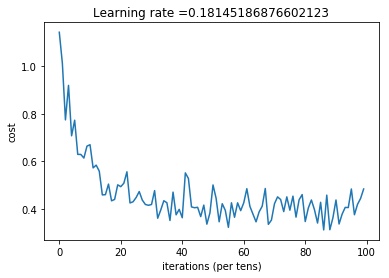

Train accuracy for current model is: 0.9366666666666666
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.9536262121339697
cost after 100 epochs is 0.22835035537404563
cost after 200 epochs is 0.20761612428502751
cost after 300 epochs is 0.19571036000187014
cost after 400 epochs is 0.19283786812192913
cost after 500 epochs is 0.19859901393857168
cost after 600 epochs is 0.18743272974918357
cost after 700 epochs is 0.18822853205385756
cost after 800 epochs is 0.18913025727515542
cost after 900 epochs is 0.18693949519641465


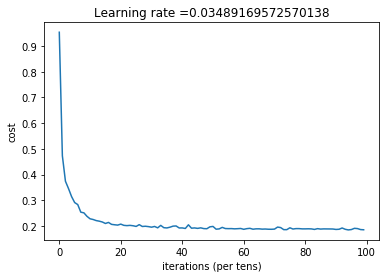

Train accuracy for current model is: 0.9333333333333333
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 12.373540569951693


/Users/Apple/Google Drive/My Deep Learning practice & innovation/My own model/Sigmoid_With_Regularization_Or_Dropout_With_Optimizers_Model/Sigmoid_With_Regularization_Or_Dropout_With_Optimizers_Model(Moon Problem)/Sigmoid_Necessary_Functions_With_Regularization_Or_Dropout_With_Optimizers_Model.py:68: RuntimeWarning: divide by zero encountered in log
  J_Cross_Entropy = -(1/m)*np.nansum((np.multiply(Y, np.log(AL)) + np.multiply((1 - Y), np.log(1 - AL))))
/Users/Apple/Google Drive/My Deep Learning practice & innovation/My own model/Sigmoid_With_Regularization_Or_Dropout_With_Optimizers_Model/Sigmoid_With_Regularization_Or_Dropout_With_Optimizers_Model(Moon Problem)/Sigmoid_Necessary_Functions_With_Regularization_Or_Dropout_With_Optimizers_Model.py:68: RuntimeWarning: invalid value encountered in multiply
  J_Cross_Entropy = -(1/m)*np.nansum((np.multiply(Y, np.log(AL)) + np.multiply((1 - Y), np.log(1 - AL))))
/Users/Apple/Google Drive/My Deep Learning practice & innovation/My own model/Si

cost after 100 epochs is 1.4538636356577381
cost after 200 epochs is 0.6194417578941611
cost after 300 epochs is 0.6383961240785231
cost after 400 epochs is 0.5497473912300037
cost after 500 epochs is 0.9991841439510836
cost after 600 epochs is 0.5543057332800683
cost after 700 epochs is 0.6816295250323461
cost after 800 epochs is 0.7216482538864278
cost after 900 epochs is 0.5684054305715717


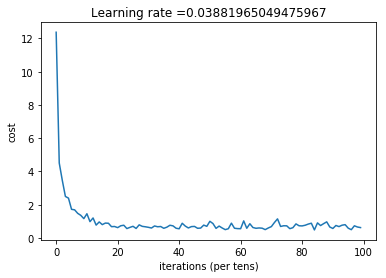

Train accuracy for current model is: 0.57
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.6785616881984948
cost after 100 epochs is 0.457354592058743
cost after 200 epochs is 0.38590571620321906
cost after 300 epochs is 0.3683726688971939
cost after 400 epochs is 0.35918325545438273
cost after 500 epochs is 0.3522190980579653
cost after 600 epochs is 0.34681827535196535
cost after 700 epochs is 0.3419754175409569
cost after 800 epochs is 0.33726911821849515
cost after 900 epochs is 0.3328505294093328


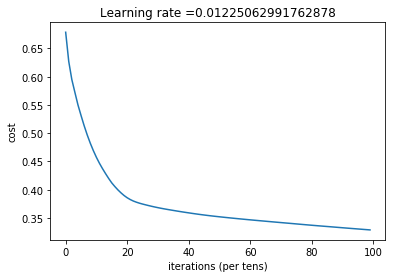

Train accuracy for current model is: 0.87
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 1.670049054554135
cost after 100 epochs is 1.290563271711605
cost after 200 epochs is 1.2431490752609875
cost after 300 epochs is 1.1134733530195586
cost after 400 epochs is 1.1154912513244222
cost after 500 epochs is 1.1928848099384468
cost after 600 epochs is 1.0464948159257275
cost after 700 epochs is 1.0234040892216232
cost after 800 epochs is 0.9392237144355118
cost after 900 epochs is 0.978238073052084


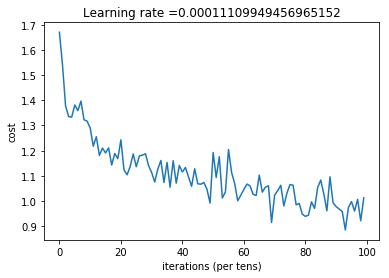

Train accuracy for current model is: 0.8466666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.8524201726420253
cost after 100 epochs is 0.6940938489592633
cost after 200 epochs is 0.6448305071649278
cost after 300 epochs is 0.6133344635250629
cost after 400 epochs is 0.5896280737527608
cost after 500 epochs is 0.5703255363145117
cost after 600 epochs is 0.554012895184683
cost after 700 epochs is 0.5393955892324657
cost after 800 epochs is 0.5261951337603161
cost after 900 epochs is 0.5140385910012386


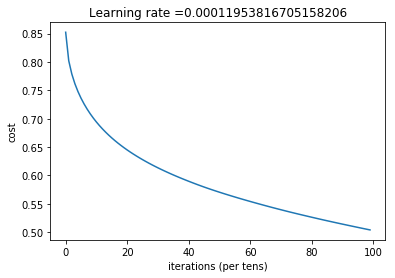

Train accuracy for current model is: 0.8566666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.9466666666666667
cost after 0 epochs is 0.9638177116363338
cost after 100 epochs is 0.5351738736931606
cost after 200 epochs is 0.33516489004760086
cost after 300 epochs is 0.33111473677960446
cost after 400 epochs is 0.3047880078085777
cost after 500 epochs is 0.32348332937746954
cost after 600 epochs is 0.3581043935310736
cost after 700 epochs is 0.26967500286786217
cost after 800 epochs is 0.34829003709196604
cost after 900 epochs is 0.2137162206755921


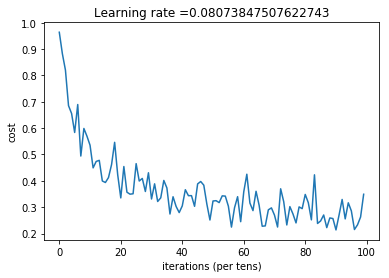

Train accuracy for current model is: 0.95
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.0056955833394423
cost after 100 epochs is 0.39250665380545735
cost after 200 epochs is 0.5321519620445866
cost after 300 epochs is 0.527144064353545
cost after 400 epochs is 0.4774696888207123
cost after 500 epochs is 0.5391319177330356
cost after 600 epochs is 0.5659673651110014
cost after 700 epochs is 0.4683871541776089
cost after 800 epochs is 0.4576840001989229
cost after 900 epochs is 0.371759700468939


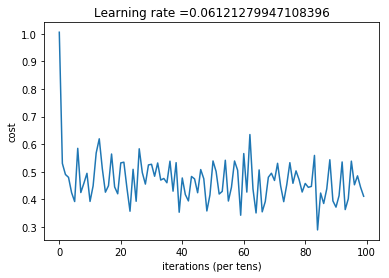

Train accuracy for current model is: 0.85
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.5206558465368842
cost after 100 epochs is 0.9608434017203983
cost after 200 epochs is 0.7533656704262709
cost after 300 epochs is 0.6662151454016101
cost after 400 epochs is 0.5874626585970205
cost after 500 epochs is 0.5675113239378888
cost after 600 epochs is 0.54666128310468
cost after 700 epochs is 0.3489906594395794
cost after 800 epochs is 0.4711833056314634
cost after 900 epochs is 0.33704629429436084


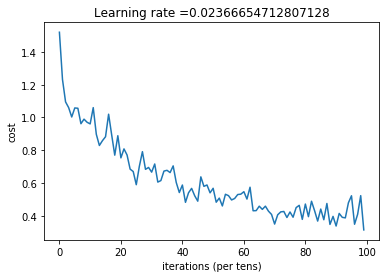

Train accuracy for current model is: 0.9366666666666666
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.0521505082639449
cost after 100 epochs is 0.4363828499569622
cost after 200 epochs is 0.29556505014327983
cost after 300 epochs is 0.25433547078609087
cost after 400 epochs is 0.24073087671942578
cost after 500 epochs is 0.23341383034923843
cost after 600 epochs is 0.22937261910237666
cost after 700 epochs is 0.22705324582254338
cost after 800 epochs is 0.22561594183108652
cost after 900 epochs is 0.22451565080949643


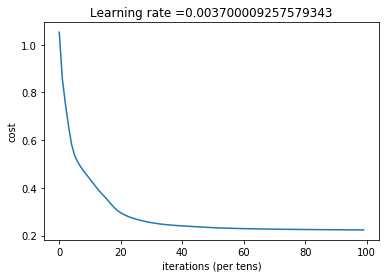

Train accuracy for current model is: 0.94
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.172267006431268
cost after 100 epochs is 1.0741530534897947
cost after 200 epochs is 0.9822863915031602
cost after 300 epochs is 0.907141696341501
cost after 400 epochs is 0.847363497508115
cost after 500 epochs is 0.8006938302374983
cost after 600 epochs is 0.7644640947546221
cost after 700 epochs is 0.7361977644303056
cost after 800 epochs is 0.7139061849008519
cost after 900 epochs is 0.6958867615992281


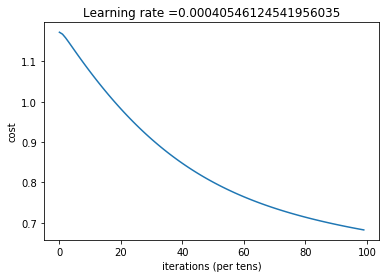

Train accuracy for current model is: 0.72
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 0.585858332398653
cost after 100 epochs is 0.4557942798645977
cost after 200 epochs is 0.39138457494721574
cost after 300 epochs is 0.3506604997113997
cost after 400 epochs is 0.4565518330764168
cost after 500 epochs is 0.431696158820316
cost after 600 epochs is 0.3804160847688205
cost after 700 epochs is 0.45923601793330887
cost after 800 epochs is 0.44385890209462775
cost after 900 epochs is 0.5147789509879351


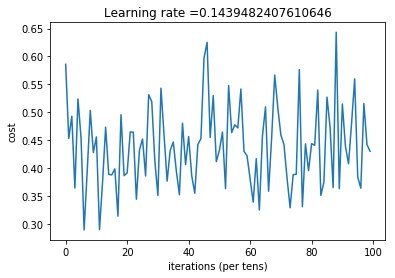

Train accuracy for current model is: 0.8533333333333334
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 0.9678200850026457
cost after 100 epochs is 0.4166844321372547
cost after 200 epochs is 0.3941517209213181
cost after 300 epochs is 0.42595000251800724
cost after 400 epochs is 0.3496018593715509
cost after 500 epochs is 0.5209602263499268
cost after 600 epochs is 0.605043817117089
cost after 700 epochs is 0.3945329707863837
cost after 800 epochs is 0.5330802380028273
cost after 900 epochs is 0.36853242617109916


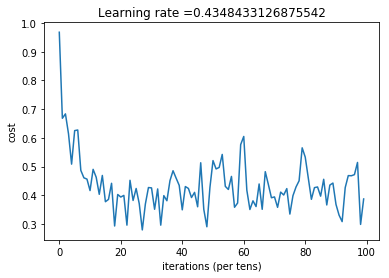

Train accuracy for current model is: 0.8766666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 3.0347164833253406
cost after 100 epochs is 2.0095251937157665
cost after 200 epochs is 1.7083219465176653
cost after 300 epochs is 1.5416920133698384
cost after 400 epochs is 1.388468784269306
cost after 500 epochs is 1.2737382387915517
cost after 600 epochs is 1.1610483270685257
cost after 700 epochs is 1.0708579049920708
cost after 800 epochs is 0.8495419854765554
cost after 900 epochs is 0.7826836604454589


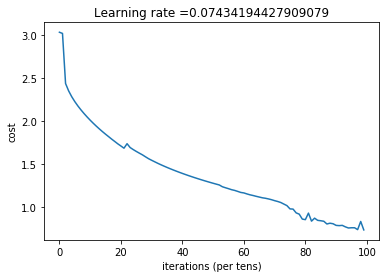

Train accuracy for current model is: 0.8766666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.1390659287870282
cost after 100 epochs is 0.8729528846694867
cost after 200 epochs is 0.7275056128108057
cost after 300 epochs is 0.65820924900578
cost after 400 epochs is 0.6188433076229352
cost after 500 epochs is 0.5926927471368759
cost after 600 epochs is 0.573488133607793
cost after 700 epochs is 0.5584741307734312
cost after 800 epochs is 0.5462814965243542
cost after 900 epochs is 0.5360780087209578


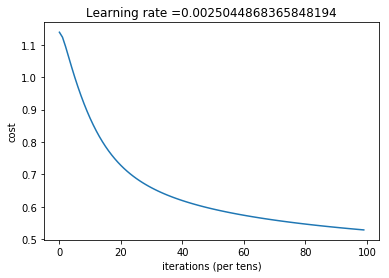

Train accuracy for current model is: 0.8133333333333334
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 6.267341732343357
cost after 100 epochs is 1.014784869418937
cost after 200 epochs is 0.6246913225736828
cost after 300 epochs is 0.6600416561656212
cost after 400 epochs is 0.7590817188456098
cost after 500 epochs is 0.7789403743793821
cost after 600 epochs is 0.8634165178473625
cost after 700 epochs is 0.7718831135920022
cost after 800 epochs is 0.6684608972644448
cost after 900 epochs is 0.7765447597557193


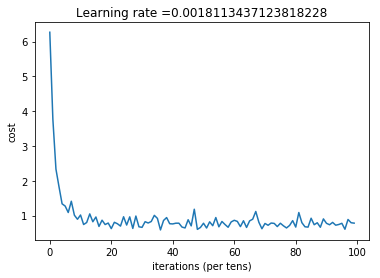

Train accuracy for current model is: 0.8466666666666667
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 19.573242428784578
cost after 100 epochs is 4.562631425742649
cost after 200 epochs is 3.4554327238526628
cost after 300 epochs is 2.808712497517117
cost after 400 epochs is 2.3732425835095414
cost after 500 epochs is 2.0910808927247
cost after 600 epochs is 1.8197238016454524
cost after 700 epochs is 1.7386301732374763
cost after 800 epochs is 1.4987178703007462
cost after 900 epochs is 1.4611084255406532


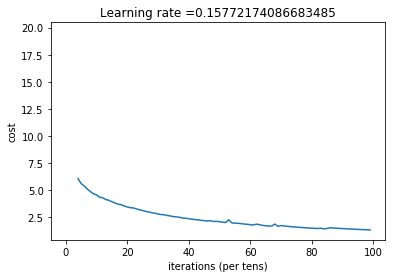

Train accuracy for current model is: 0.5
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.5471689937291266
cost after 100 epochs is 0.7799794768108086
cost after 200 epochs is 0.6513207390984874
cost after 300 epochs is 0.5678122442242772
cost after 400 epochs is 0.5594992197512122
cost after 500 epochs is 0.4787305289065863
cost after 600 epochs is 0.4925974421510315
cost after 700 epochs is 0.5290629064097971
cost after 800 epochs is 0.49889030453589667
cost after 900 epochs is 0.48216293577082453


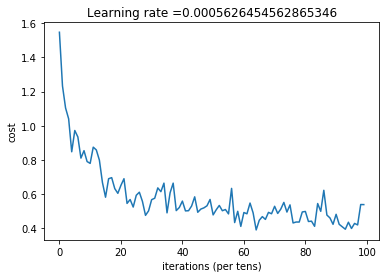

Train accuracy for current model is: 0.94
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 0.8973916281903992
cost after 100 epochs is 0.21051924647104253
cost after 200 epochs is 0.20894001081308178
cost after 300 epochs is 0.20598206154710896
cost after 400 epochs is 0.20607132540617967
cost after 500 epochs is 0.20632449376247702
cost after 600 epochs is 0.2062293223894128
cost after 700 epochs is 0.20815224132385904
cost after 800 epochs is 0.20533399473144232
cost after 900 epochs is 0.2078222432802392


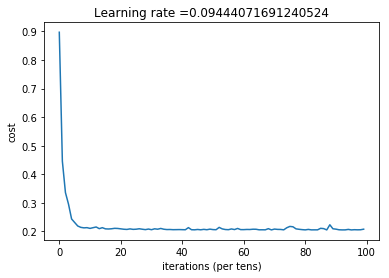

Train accuracy for current model is: 0.9366666666666666
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.116817297842083
cost after 100 epochs is 0.674355433451563
cost after 200 epochs is 0.5775739288774081
cost after 300 epochs is 0.542764084637845
cost after 400 epochs is 0.5291981445994496
cost after 500 epochs is 0.5218206314864811
cost after 600 epochs is 0.5158833294468222
cost after 700 epochs is 0.5109518381182077
cost after 800 epochs is 0.5066002434725881
cost after 900 epochs is 0.5025649740855822


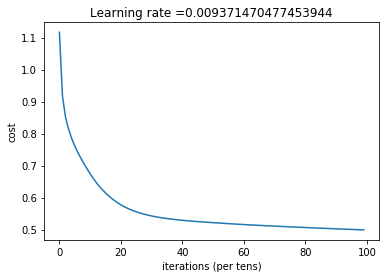

Train accuracy for current model is: 0.86
Maximum Train accuracy until now using different set of hyperparameters is 0.95
cost after 0 epochs is 1.0418903718992703
cost after 100 epochs is 0.6875519827125247


In [ ]:
parameters = automated_hyperparameters_tuning(X_train, Y_train)

In [ ]:
        train_accuracy = predict_accuracy(X_train, Y_train, parameters)

        lst_param_accuracy = []
        tpl_param_accuracy = (parameters, train_accuracy)
        lst_param_accuracy.append(tpl_param_accuracy)
        parameters_for_max_train_accuracy, max_train_accuracy = max(lst_param_accuracy,key=lambda item:item[1])
        
        
        print('Train accuracy for current model is: '+str(train_accuracy))
        print('Maximum Train accuracy until now using different set of hyperparameters is ' +str(max_train_accuracy))
        hyperparameters_for_max_train_accuracy = (layers_dims, minibatch_size, lambd, optimizer, learning_rate)